In [1]:

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = datasets.load_iris()

In [4]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [5]:
data['Species']=iris['target']

In [6]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [7]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.isnull().any()

Petal length    False
Petal Width     False
Sepal Length    False
Sepal Width     False
Species         False
dtype: bool

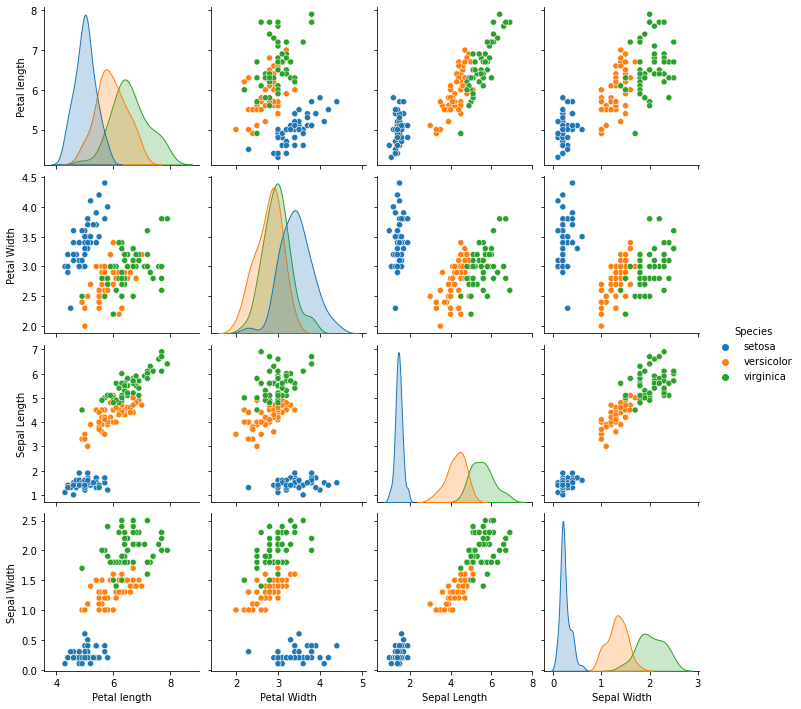

In [9]:
sns.pairplot(data, hue='Species')
plt.show()

[]

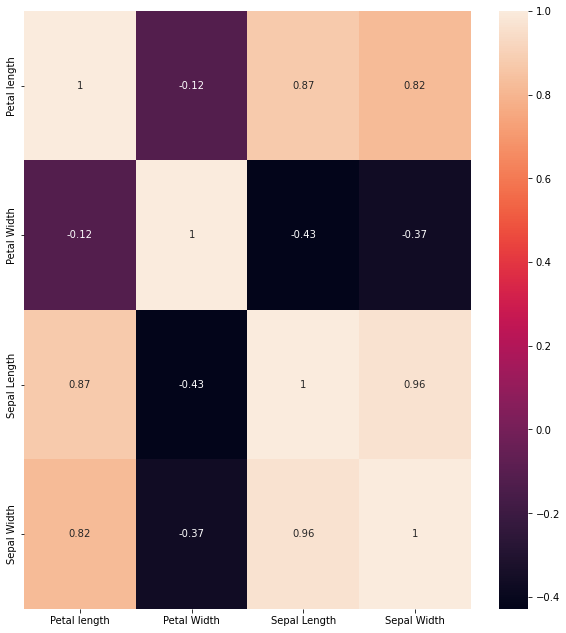

In [10]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [11]:
X = data[["Sepal Length","Sepal Width","Petal length","Petal Width"]].values
Y = data['Species'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=1)

In [12]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

In [13]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [14]:
prediction = DT.predict(X_test)
prediction

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [15]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



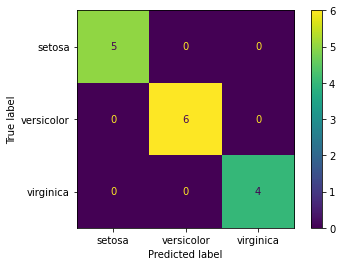

In [16]:
plot_confusion_matrix(DT, X_test, Y_test)

In [21]:
df = pd.read_csv('loan_data.csv')

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [23]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)

In [24]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:

from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=600)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [32]:
rfc_pred = rfc.predict(X_test)

In [37]:
cr = classification_report(y_test,predictions)


In [36]:

predictions = dtree.predict(X_test)

In [38]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2433
           1       0.20      0.23      0.21       441

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.75      0.75      2874



In [42]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

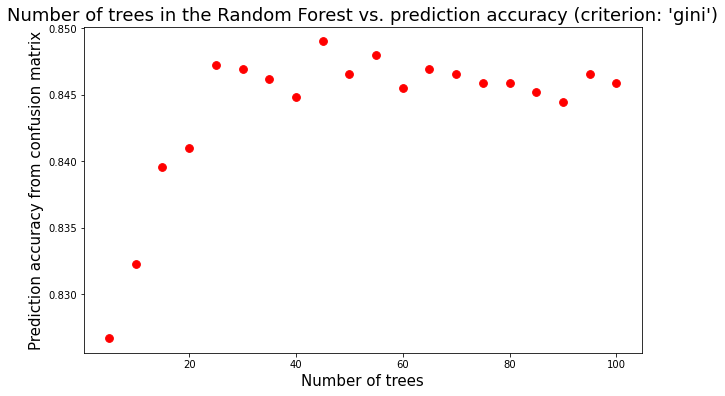

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)